In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree


In [2]:
dfn= pd.read_csv("dataset//dataset_sdn_normal.csv")
print(dfn.head())
print(dfn.info())

      dt  switch        src        dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  167772161  167772168     45304   48294064  100  716000000   
1  11605       1  167772161  167772168    126395  134737070  280  734000000   
2  11425       1  167772162  167772168     90333   96294978  200  744000000   
3  11425       1  167772162  167772168     90333   96294978  200  744000000   
4  11425       1  167772162  167772168     90333   96294978  200  744000000   

        tot_dur  flows  ...  Protocol  port_no   tx_bytes  rx_bytes  tx_kbps  \
0  1.010000e+11      3  ...         1        3  143928631      3917        0   
1  2.810000e+11      2  ...         1        4       3842      3520        0   
2  2.010000e+11      3  ...         1        1       3795      1242        0   
3  2.010000e+11      3  ...         1        2       3688      1492        0   
4  2.010000e+11      3  ...         1        3       3413      3665        0   

   rx_kbps  A1  A2  tot_kbps  label  
0     

In [3]:
dfa= pd.read_csv("dataset//dataset_sdn_Attack.csv")
print(dfa.head())
print(dfa.info())

      dt  switch        src        dst  pktcount  bytecount  dur   dur_nsec  \
0  11335       1  167772161  167772168      4777    5092282   10  711000000   
1  11335       1  167772161  167772168      4777    5092282   10  711000000   
2  11335       1  167772161  167772168      4777    5092282   10  711000000   
3  11335       1  167772161  167772168      4777    5092282   10  711000000   
4  11335       1  167772161  167772168      4777    5092282   10  711000000   

        tot_dur  flows  ...  Protocol  port_no  tx_bytes  rx_bytes  tx_kbps  \
0  1.071100e+10      3  ...         1        2      3753      1332        0   
1  1.071100e+10      3  ...         1        3      3679  58460931        0   
2  1.071100e+10      3  ...         1        2      3733      1402        0   
3  1.071100e+10      3  ...         1        4  58460931      3749     5232   
4  1.071100e+10      3  ...         1        3      3413      3623        0   

   rx_kbps  A1  A2  tot_kbps  label  
0      0.0  

In [4]:
l=[dfn,dfa]
df=pd.concat(l)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104345 entries, 0 to 40783
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  int64  
 3   dst          104345 non-null  int64  
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  int64  
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-n

In [5]:
df=df.drop_duplicates()

In [ ]:
df.corr()

In [6]:
#normalization
df=(df-df.min())/(df.max()-df.min())
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.dropna()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99254 entries, 0 to 40783
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           99254 non-null  float64
 1   switch       99254 non-null  float64
 2   src          99254 non-null  float64
 3   dst          99254 non-null  float64
 4   pktcount     99254 non-null  float64
 5   bytecount    99254 non-null  float64
 6   dur          99254 non-null  float64
 7   dur_nsec     99254 non-null  float64
 8   tot_dur      99254 non-null  float64
 9   flows        99254 non-null  float64
 10  packetins    99254 non-null  float64
 11  pktperflow   99254 non-null  float64
 12  byteperflow  99254 non-null  float64
 13  pktrate      99254 non-null  float64
 14  Pairflow     99254 non-null  float64
 15  Protocol     99254 non-null  float64
 16  port_no      99254 non-null  float64
 17  tx_bytes     99254 non-null  float64
 18  rx_bytes     99254 non-null  float64
 19  tx_k

In [8]:
df = df.drop(columns=['A1', 'A2'])
df = df[df['tot_kbps'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98748 entries, 0 to 40783
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           98748 non-null  float64
 1   switch       98748 non-null  float64
 2   src          98748 non-null  float64
 3   dst          98748 non-null  float64
 4   pktcount     98748 non-null  float64
 5   bytecount    98748 non-null  float64
 6   dur          98748 non-null  float64
 7   dur_nsec     98748 non-null  float64
 8   tot_dur      98748 non-null  float64
 9   flows        98748 non-null  float64
 10  packetins    98748 non-null  float64
 11  pktperflow   98748 non-null  float64
 12  byteperflow  98748 non-null  float64
 13  pktrate      98748 non-null  float64
 14  Pairflow     98748 non-null  float64
 15  Protocol     98748 non-null  float64
 16  port_no      98748 non-null  float64
 17  tx_bytes     98748 non-null  float64
 18  rx_bytes     98748 non-null  float64
 19  tx_k

In [9]:
X=df.iloc[:,0:22]
y=df['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

RANDOM FOREST

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
ypred=rf.predict(X_test)
print("RANDOM FOREST")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

RANDOM FOREST
Confusion matrix:
 [[30585     8]
 [    0 18781]]
Accuracy:  0.9998379714019524


DECISION TREE

In [16]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.43916223404255317, 0.9736842105263158, 'bytecount <= 0.001\ngini = 0.473\nsamples = 49374\nvalue = [30429, 18945]'),
 Text(0.15425531914893617, 0.9210526315789473, 'Protocol <= 0.556\ngini = 0.017\nsamples = 15979\nvalue = [15841, 138]'),
 Text(0.13297872340425532, 0.868421052631579, 'packetins <= 0.036\ngini = 0.387\nsamples = 187\nvalue = [49, 138]'),
 Text(0.11170212765957446, 0.8157894736842105, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(0.15425531914893617, 0.8157894736842105, 'packetins <= 0.701\ngini = 0.104\nsamples = 146\nvalue = [8, 138]'),
 Text(0.13297872340425532, 0.7631578947368421, 'gini = 0.0\nsamples = 138\nvalue = [0, 138]'),
 Text(0.17553191489361702, 0.7631578947368421, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.17553191489361702, 0.868421052631579, 'gini = 0.0\nsamples = 15792\nvalue = [15792, 0]'),
 Text(0.7240691489361702, 0.9210526315789473, 'byteperflow <= 0.978\ngini = 0.492\nsamples = 33395\nvalue = [14588, 18807]'),
 Text(0.51196808

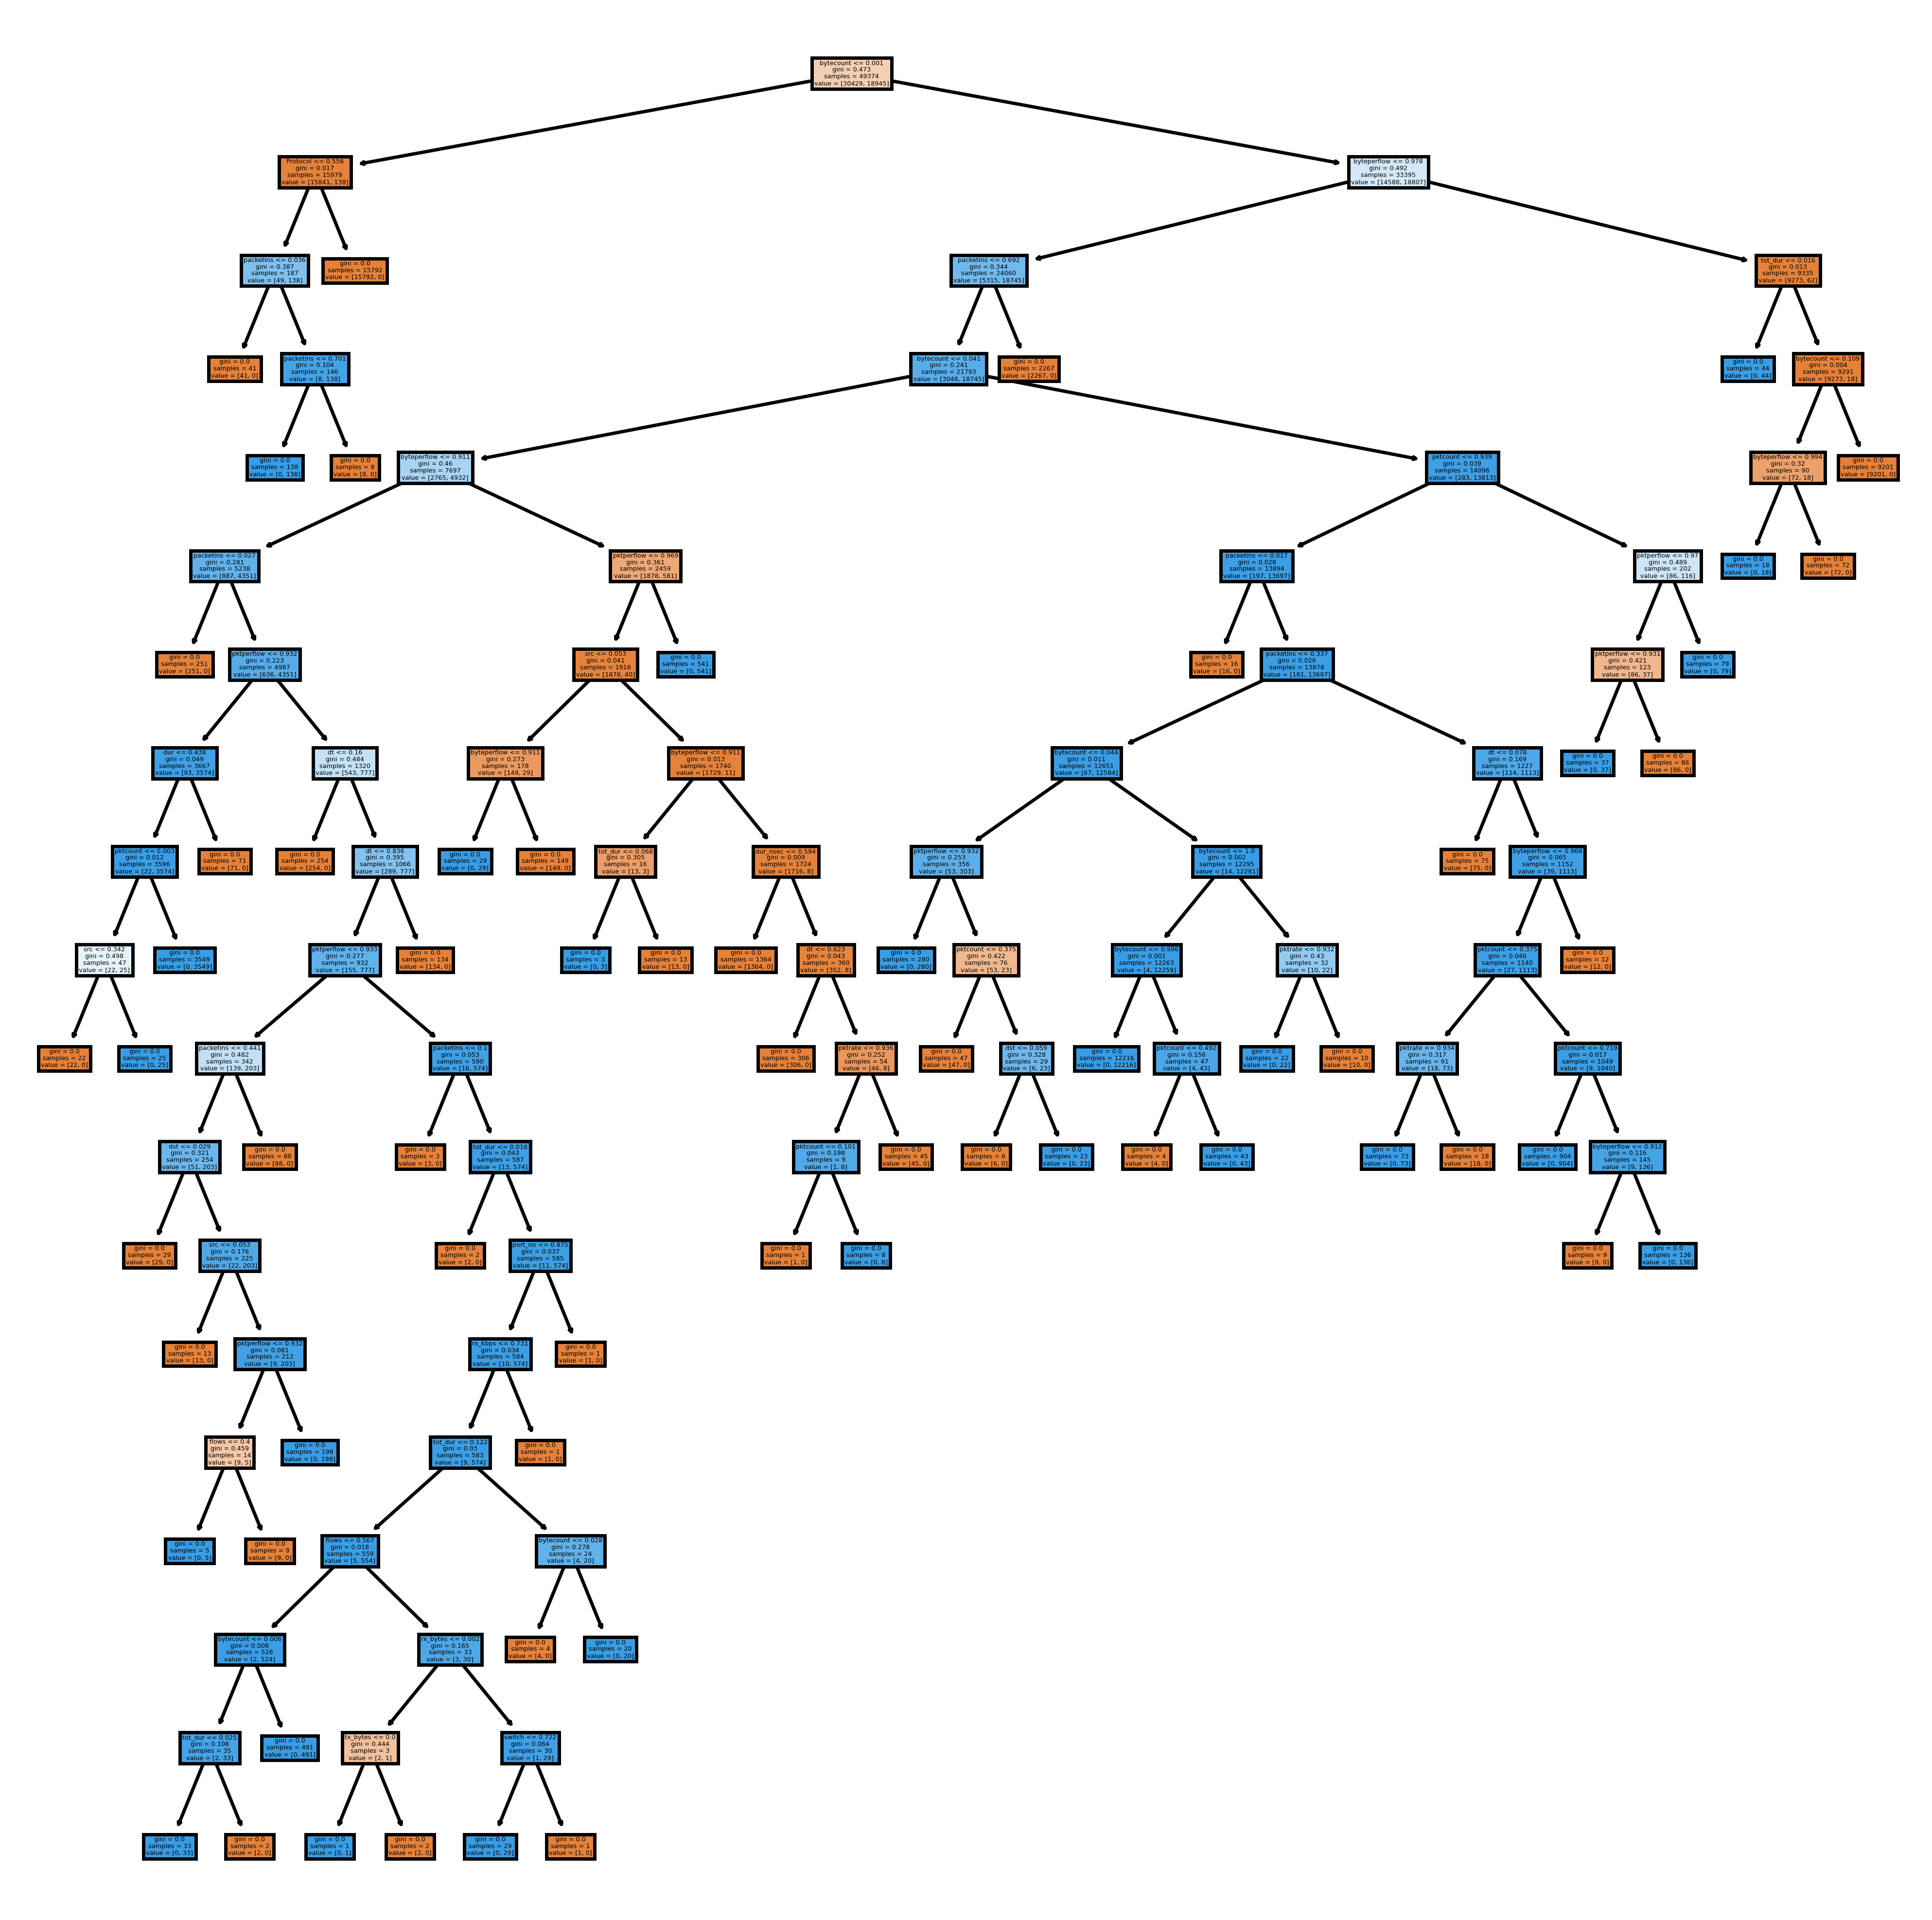

In [17]:
plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=X.columns,filled=True)

In [18]:
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[30578    15]
 [    2 18779]]
Accuracy:  0.9996556892291489


In [19]:

sv = svm.SVC()
sv.fit(X_train,y_train)

SVC()

In [20]:
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

SVM
Confusion matrix:
 [[29185  1408]
 [  618 18163]]
Accuracy:  0.9589662575444566


FEATURE SELECTION USING RF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel.get_support()


array([False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False])

In [ ]:
col=X.columns
selcol=sel.get_support()
l=[col[i] for i in range(22) if selcol[i]==False]
print(l)

['dt', 'switch', 'src', 'dst', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


In [ ]:
X_train = X_train.drop(columns=l)
X_test = X_test.drop(columns=l)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29624 entries, 39726 to 27010
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pktcount     29624 non-null  float64
 1   bytecount    29624 non-null  float64
 2   packetins    29624 non-null  float64
 3   pktperflow   29624 non-null  float64
 4   byteperflow  29624 non-null  float64
 5   pktrate      29624 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
print("RANDOM FOREST")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))

RANDOM FOREST
Confusion matrix:
 [[42665    10]
 [    3 26446]]
Accuracy:  0.9998119321798506
Precision:  0.9996220139098881
Recall:  0.999886574161594
F1:  0.9997542765334089


In [ ]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[42662    13]
 [    7 26442]]
Accuracy:  0.999710664892078
Precision:  0.9995085995085995
Recall:  0.999735339710386
F1:  0.9996219567518524


In [ ]:
sv = svm.SVC()
sv.fit(X_train,y_train)
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))


SVM
Confusion matrix:
 [[40117  2558]
 [ 4741 21708]]
Accuracy:  0.8944071523638678
Precision:  0.8945850160718701
Recall:  0.8207493667057356
F1:  0.8560780834072761


Feature selsction using SVM

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False,max_iter=5000).fit(X_train, y_train)
sel = SelectFromModel(lsvc, prefit=True)

In [24]:
col=X.columns
selcol=sel.get_support()
l=[col[i] for i in range(22) if selcol[i]==False]
print(l)

['dt', 'switch', 'dst', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'pktperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


In [25]:
X_train = X_train.drop(columns=l)
X_test = X_test.drop(columns=l)


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29624 entries, 13862 to 45830
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   src          29624 non-null  float64
 1   pktcount     29624 non-null  float64
 2   bytecount    29624 non-null  float64
 3   packetins    29624 non-null  float64
 4   byteperflow  29624 non-null  float64
 5   Protocol     29624 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


In [27]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
print("RANDOM FOREST")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))

RANDOM FOREST
Confusion matrix:
 [[42708    24]
 [   10 26382]]
Accuracy:  0.9995081303165326
Precision:  0.9990911156555329
Recall:  0.9996210973022128
F1:  0.999356036213493


In [28]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[42690    42]
 [   21 26371]]
Accuracy:  0.9990885944100457
Precision:  0.9984098739257184
Recall:  0.9992043043346469
F1:  0.9988069311618218


In [29]:
sv = svm.SVC()
sv.fit(X_train,y_train)
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))


SVM
Confusion matrix:
 [[39797  2935]
 [ 1083 25309]]
Accuracy:  0.9418725768184711
Precision:  0.8960841240617476
Recall:  0.9589648378296454
F1:  0.9264587451497182


RECURSIVE FEATURE ELIMINATION


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [45]:
rfe.get_feature_names_out()

array(['pktcount', 'bytecount', 'packetins', 'pktperflow', 'byteperflow'],
      dtype=object)

In [46]:
X_train=rfe.transform(X_train)
X_test=rfe.transform(X_test)

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
print("RANDOM FOREST")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))

RANDOM FOREST
Confusion matrix:
 [[42870    12]
 [    0 26242]]
Accuracy:  0.9998263989352468
Precision:  0.9995429267921079
Recall:  1.0
F1:  0.9997714111551357


In [48]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[42869    13]
 [    7 26235]]
Accuracy:  0.999710664892078
Precision:  0.9995047241694606
Recall:  0.9997332520387165
F1:  0.9996189750428653


In [49]:
sv = svm.SVC()
sv.fit(X_train,y_train)
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))


SVM
Confusion matrix:
 [[40242  2640]
 [ 4134 22108]]
Accuracy:  0.9020021989468202
Precision:  0.89332471310813
Recall:  0.8424662754363235
F1:  0.8671504216513041


PCA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)

print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))


Confusion matrix:
 [[41615  1173]
 [ 1327 25009]]
Accuracy:  0.9638331115097506
Precision:  0.9551982277900848
Recall:  0.9496126974483596
F1:  0.9523972733158156


In [20]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[40431  2357]
 [ 2471 23865]]
Accuracy:  0.9301545049476303
Precision:  0.9101136450308901
Recall:  0.9061740583232077
F1:  0.908139579131626


In [21]:
sv = svm.SVC()
sv.fit(X_train,y_train)
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))
print("Precision: ",precision_score(y_test,ypred))
print("Recall: ",recall_score(y_test,ypred))
print("F1: ",f1_score(y_test,ypred))


SVM
Confusion matrix:
 [[40332  2456]
 [ 2021 24315]]
Accuracy:  0.9352323360916613
Precision:  0.9082589369093422
Recall:  0.923260935601458
F1:  0.9156984954902367
